# hot-CNO and breakout

In [9]:
import pynucastro as pyna

This collection of rates has the main CNO rates plus a breakout rate into the hot CNO cycle(s)

In [10]:
rl = pyna.ReacLibLibrary()

We'll get all the rates linking the core nuclei in CNO and the various hot-CNO cycles, but we'll explicitly remove $3-\alpha$, since it is not strong at the temperatures where CNO operates.

In [18]:
linking_nuclei = ["p", "he4",
                  "c12", "c13",
                  "n13", "n14", "n15",
                  "o14", "o15",]
lib = rl.linking_nuclei(linking_nuclei, with_reverse=False)
r3a = lib.get_rate_by_name("he4(aa,g)c12")
lib.remove_rate(r3a)

In [19]:
rc = pyna.RateCollection(libraries=lib)

To evaluate the rates, we need a composition.  This is defined using a list of Nuceli objects.  

In [20]:
comp = pyna.Composition(rc.get_nuclei())
comp.set_solar_like()

## Transition from CNO to hot-CNO

Let's look at the CNO cycle at a temperature and density just a bit hotter than the Sun's core

In [21]:
T = 2.e7
rho = 200

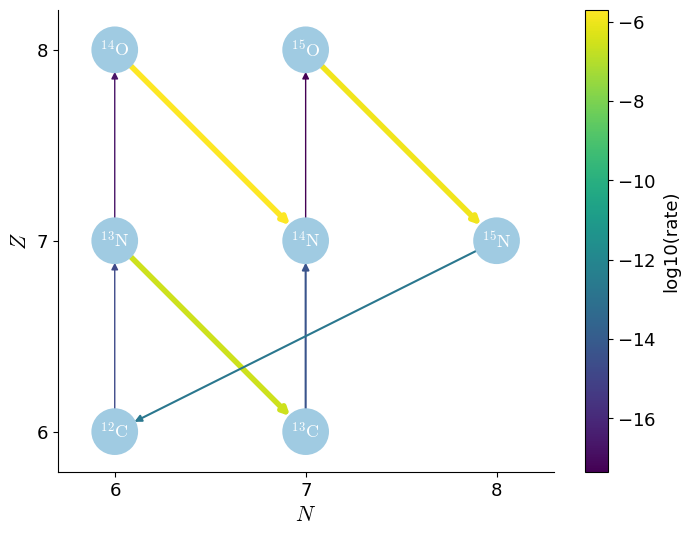

In [22]:
fig = rc.plot(rho=rho, T=T, comp=comp, ydot_cutoff_value=1.e-20)

We see that if we start with ${}^{12}\mathrm{C}$, then we capture a proton to make ${}^{13}\mathrm{N}$, and almost immediately beta decay to ${}^{13}\mathrm{C}$, since the beta-decay rate is so much faster than a proton capture on ${}^{13}\mathrm{N}$.

The CNO cycle continues with proton captures making ${}^{14}\mathrm{N}$ and then ${}^{15}\mathrm{O}$, and then another beta-decay to get ${}^{15}\mathrm{N}$ before finally, doing ${}^{15}\mathrm{N}(p,\alpha){}^{12}\mathrm{C}$, getting us back to where we started.

Now let's make it a bit hotter

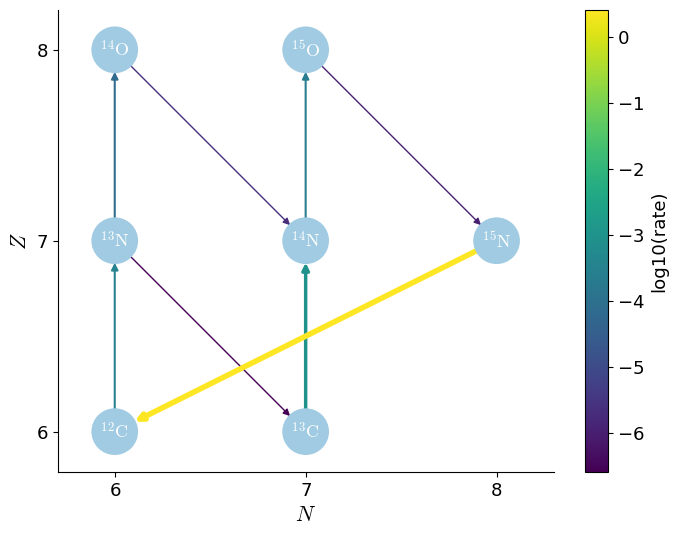

In [24]:
T = 2.e8
fig = rc.plot(rho=rho, T=T, comp=comp, ydot_cutoff_value=1.e-20)

Now we see that the proton capture on ${}^{13}\mathrm{N}$ is faster than the beta-decay, and we make ${}^{14}\mathrm{O}$.

As we increase the temperature and density further, we see that the beta decays become the rate-limiting steps.

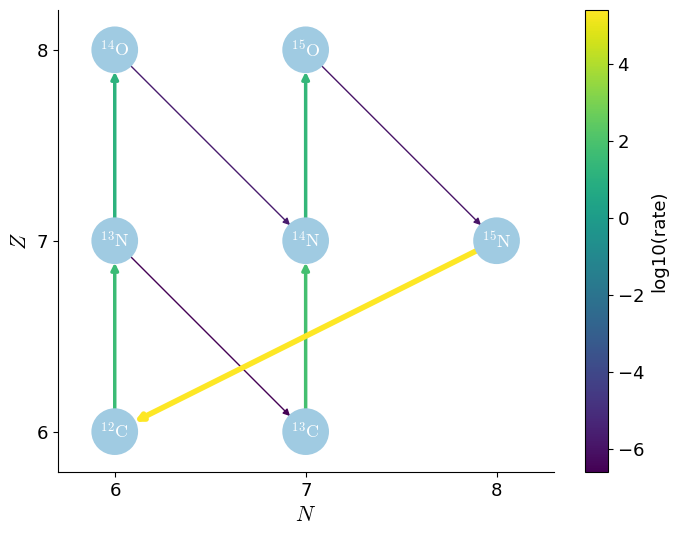

In [26]:
T = 5.e8
rho = 1.e4
fig = rc.plot(rho=rho, T=T, comp=comp, ydot_cutoff_value=1.e-20)

Since the beta-decays are temperature independent (you just have to wait for the nucleus to decay), the overall hot-CNO rate becomes insensitive to temperature.

We can look at the temperature where we cross from CNO to hot-CNO by looking at the rates involving ${}^{13}\mathrm{N}$

In [30]:
r1 = rl.get_rate_by_name("n13(p,g)o14")
r2 = rl.get_rate_by_name("n13(,)c13")

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
T = np.logspace(7.5, 8.5, 100)

rate_p_capture = [r1.eval(temp) for temp in T]
rate_beta_decay = [r2.eval(temp) for temp in T]

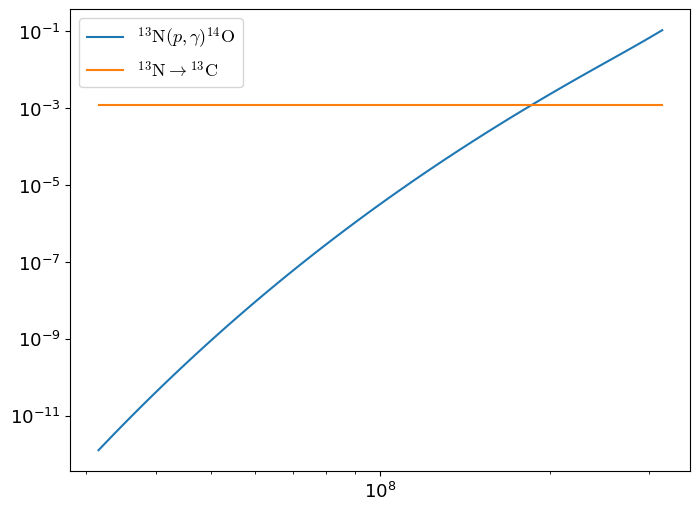

In [33]:
fig, ax = plt.subplots()
ax.plot(T, rate_p_capture, label=r"${}^{13}\mathrm{N}(p,\gamma){}^{14}\mathrm{O}$")
ax.plot(T, rate_beta_decay, label=r"${}^{13}\mathrm{N} \rightarrow {}^{13}\mathrm{C}$")
ax.legend()
ax.set_xscale("log")
ax.set_yscale("log")

We see that above $T \sim 2\times 10^8~\mathrm{K}$, the proton-capture proceeds faster than the beta-decay, and we transition to hot-CNO.

## Exploring a larger net

Interactive exploration is enabled through the Explorer class, which takes a RateCollection and a Composition

In [34]:
linking_nuclei = ["p", "he4",
                  "c12", "c13",
                  "n13", "n14", "n15",
                  "o14", "o15", "o16", "o17", "o18",
                  "f17", "f18", "f19",
                  "ne18", "ne19", "ne20",
                  "na20"]

lib = rl.linking_nuclei(linking_nuclei, with_reverse=False)
r3a = lib.get_rate_by_name("he4(aa,g)c12")
lib.remove_rate(r3a)

rc = pyna.RateCollection(libraries=lib)

comp = pyna.Composition(rc.get_nuclei())
comp.set_solar_like()

In [35]:
re = pyna.Explorer(rc, comp, size=(1000,1000), hide_xalpha=True,
                   ydot_cutoff_value=1.e-25, show_small_ydot=True)
re.explore()

interactive(children=(FloatSlider(value=4.0, description='logrho', max=6.0, min=2.0), FloatSlider(value=8.0, d…

Notice that as you increase the temperature, eventually the proton capture onto ${}^{13}\mathrm{N}$ becomes faster than the $\beta$-decay.  We can plot the temperature sensitivity of these two rates